## Computational Fluid Dynamics (CFD)

### Lid-driven cavity

The following script computes the solution of the Navier-Stokes problem
in a lid-driven cavity. The pressure and streamfunction are solved using
a SOR approach and the momentum equations are solved using an explicit
time-advancement scheme (Euler method, RK1).

### System setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [2]:
sys.path.append('../src/')

In [3]:
from flow_simulation import simulate_flow

### Parameters

#### Grid parameters

In [4]:
Nxc = 128
Nyc = 128

#### Simulation parameters

In [5]:
Re = 1000 # Reynolds Number
tf = 10 # Final Simulation Time
SOR = 1.5 # SOR Factor
n_iter = 10 # Max. # of iterations
dt = 0.01 # Time Step

#### Boundary conditions

In [6]:
Un = 1.0 # upper boundary
Us = 0.0 # bottom plate
Vw = 0.0 # left plate
Ve = 0.0 # right plate

#### Initial Conditions

In [7]:
u = np.zeros((Nxc+1, Nyc+2))
v = np.zeros((Nxc+2, Nyc+1))

### Pressure boundary conditions

In [8]:
%%time

X, Y, STREAMLINE, u_contour, v_contour, p_contour, vorticity = (
    simulate_flow(u, v, Nxc, Nyc, dt, tf, n_iter, SOR, Re, Us, Un, Vw, Ve)
)

CPU times: user 25min 31s, sys: 11.7 s, total: 25min 43s
Wall time: 39min 54s


In [9]:
# If the plots below don't work, try installing latex as shown below...
# !pip install latex

### Visualize

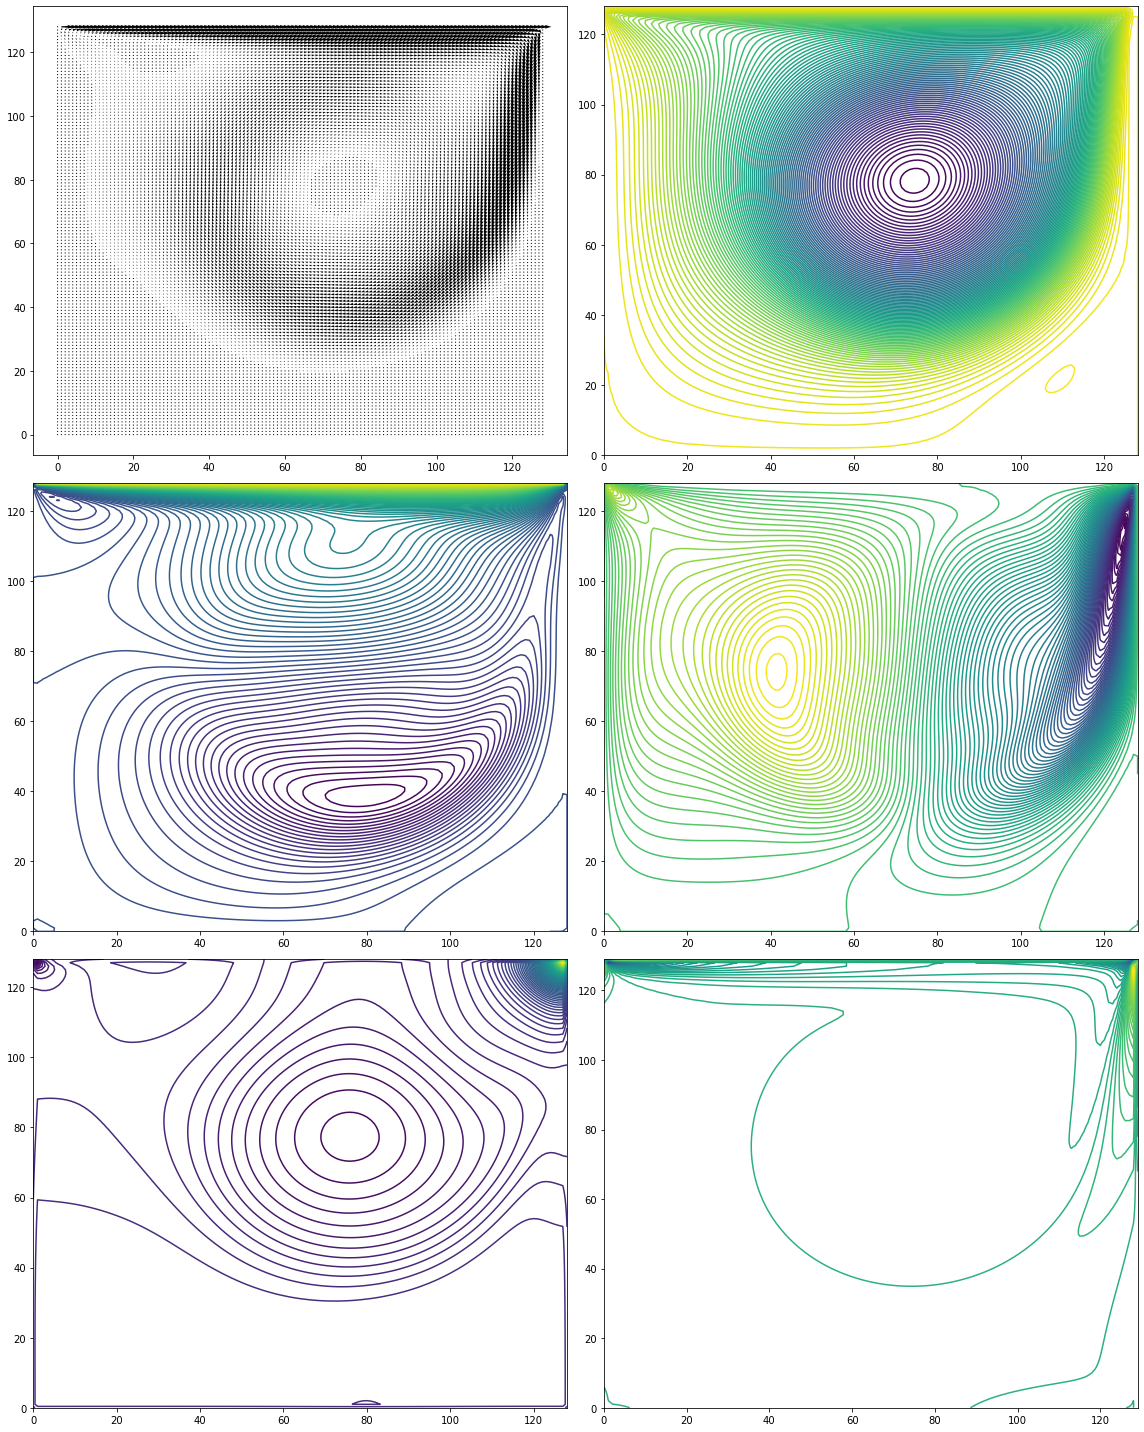

In [10]:
fig, ax = plt.subplots(3, 2, figsize=(16, 20))

ax = ax.ravel()

ax[0].quiver(
    np.flipud(np.rot90(u_contour)),
    np.flipud(np.rot90(v_contour))
)

ax[1].contour(X, Y, STREAMLINE, 100)

ax[2].contour(np.rot90(np.fliplr(u_contour)), 100)

ax[3].contour(np.rot90(np.fliplr(v_contour)), 100)

ax[4].contour(np.rot90(np.fliplr(p_contour)), 100)

ax[5].contour(np.rot90(np.fliplr(vorticity)), 100)

fig.tight_layout()